<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* IsActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
    - 0 = No ( Customer did not leave the bank )
    - 1 = Yes ( Customer left the bank )

## **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 imbalanced-learn==0.10.1 -q --user

**Note:** After running the above cell, please restart the notebook kernel/runtime (depending on whether you're using Jupyter Notebook or Google Colab) and then sequentially run all cells from the one below.

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
    ds = pd.read_csv("/content/drive/Othercomputers/My Mac/My Drive (tibsonk@gmail.com)/School/UT_Austin/Neural_Networks/Week_2/Churn.csv")

## Data Overview

### View the first and last 5 rows of the dataset.

In [ ]:
# Let's view the first 5 rows of the data
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# let's view the last 5 rows of the data
ds.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Understand the shape of the dataset

In [ ]:
# Checking the number of rows and columns in the training data
ds.shape

(10000, 14)

*   The dataset has 100000 rows & 14 columns


### Check the data types of the columns for the dataset

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB



* There are 10000 observations and 14 columns in the data.
* 3 columns are of the object datatype and 11 columns are numerical (float & int).



In [ ]:
# Checking for duplicate values in the data
ds.duplicated().sum()

0

* No duplicates in the data

### Checking the Statistical Summary

In [ ]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


Observations
* The average credit score is around 650 with a standard deviation of approximately 97. The minimum credit score is 350, and the maximum is 850. The middle 50% of customers have credit scores between 584 and 718, indicating that the majority of customers are in the mid-range for credit scores.
* The average tenure is about 5 years, with a standard deviation of 2.89 years. The minimum tenure is 0 years (likely new customers), and the maximum is 10 years. The middle 50% of customers have been with the bank for 3 to 7 years.

### Checking for Missing Values

In [ ]:
# let's check for missing values in the data
ds.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


* No missing values

### Checking for unique values for each of the column

In [ ]:
ds.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


* RowNumber & CustomerId are irrelevant here


In [ ]:
#RowNumber , CustomerId and Surname are unique hence dropping it
ds = ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [ ]:
ds.nunique()

,0
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4
HasCrCard,2
IsActiveMember,2
EstimatedSalary,9999


## Exploratory Data Analysis

### Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on CreditScore

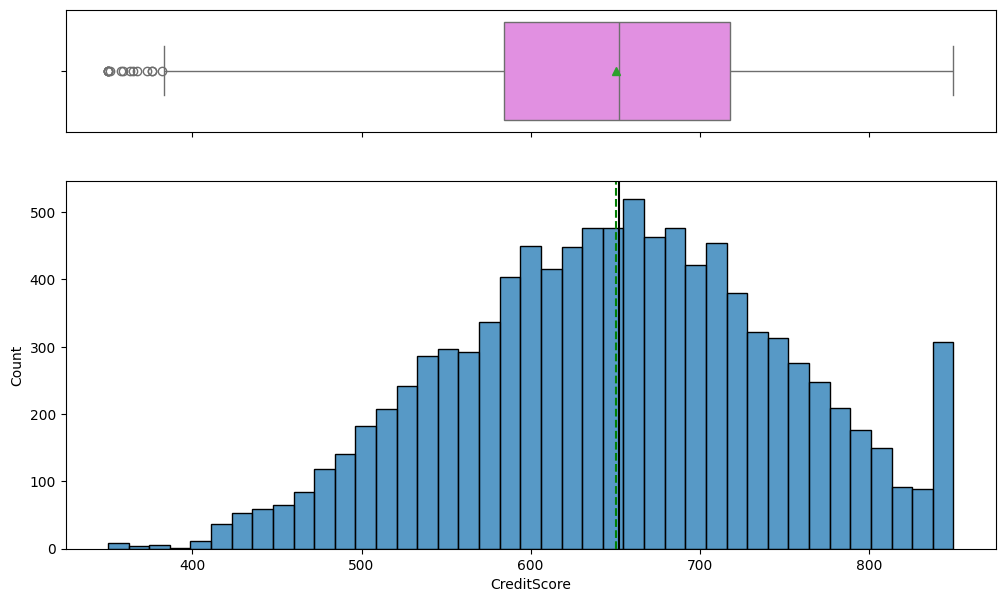

In [ ]:
histogram_boxplot(ds,'CreditScore')

* The majority of customers have a CreditScore between 580 and 740. The distribution appears to be skewed towards the higher end, with more customers falling into the higher score ranges, suggesting the bank’s customer base has relatively good credit scores.

#### Observations on Age

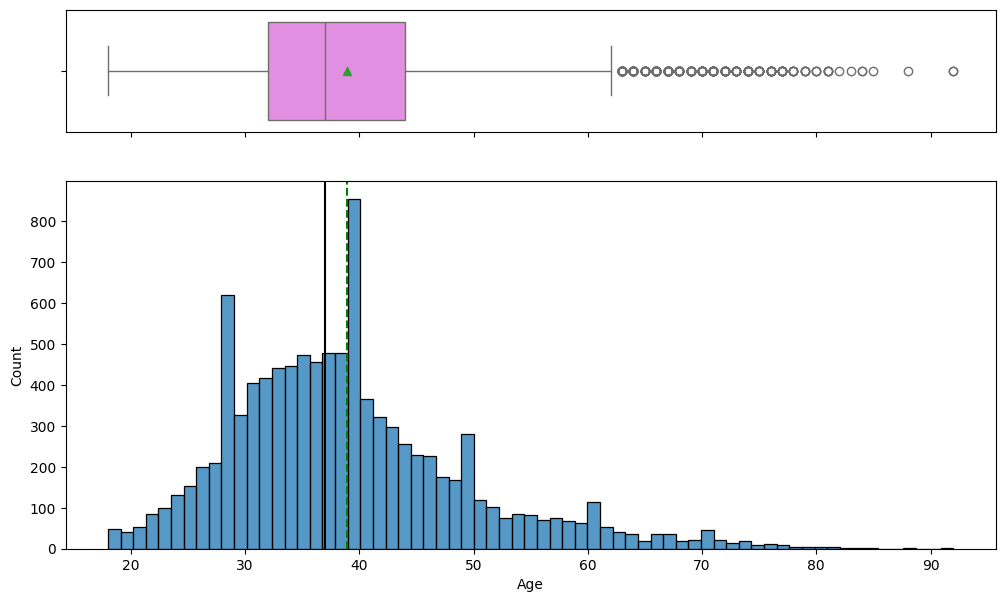

In [ ]:
histogram_boxplot(ds,'Age')

* The Age distribution is skewed slightly to the left, with a median around 40 years. The majority of the data points are clustered between 25 and 50 years of age, indicating that the bank’s customers are predominantly in this age group.
* The frequency starts to drop off sharply after 50 years, with very few customers older than 70. The peak of the distribution is clearly around 40 years of age, with the count tapering off as the age increases beyond this point.

#### Observations on Balance

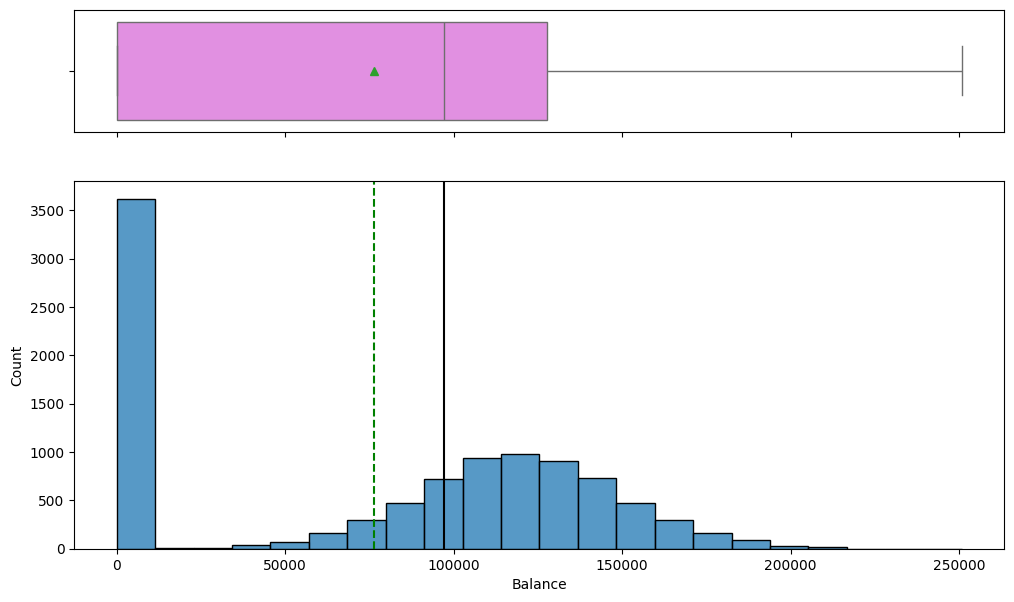

In [ ]:
histogram_boxplot(ds, 'Balance')

* The histogram reveals a highly skewed distribution, with most customers having balances near zero. The distribution increases slowly as the balance value rises, with a gradual tapering off.
* The balance seems to plateau at higher values (around 140,000), with very few customers having balances above this threshold. This suggests that the majority of customers maintain relatively modest balances.

#### Observations on Estimated Salary

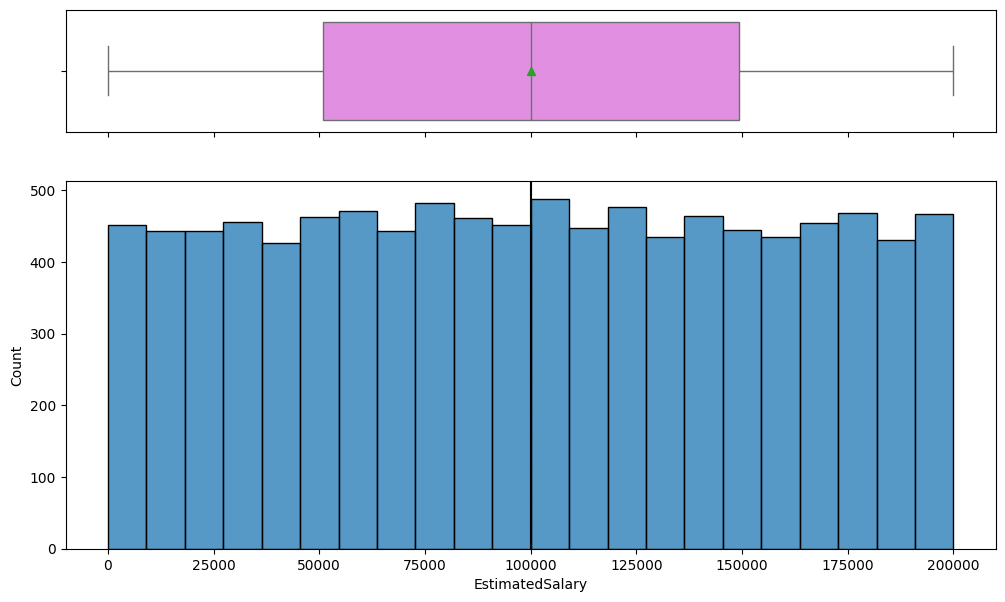

In [ ]:
histogram_boxplot(ds,'EstimatedSalary')

* The EstimatedSalary variable has a relatively uniform distribution with most of the data concentrated around the median. There is no significant skew, but the boxplot indicates a fairly consistent distribution of salaries.
* The histogram reveals a fairly even distribution of salaries, with a slight tendency towards the middle values between 50,000 and 100,000. The distribution appears almost uniform across the salary range from 0 to 200,000 indicating a fairly balanced representation of salary across the entire spectrum. This implies that the dataset may be diverse in terms of employee salary levels.

#### Observations on Exited

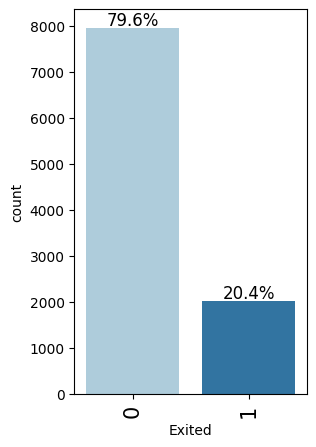

In [ ]:
labeled_barplot(ds, "Exited", perc=True)

* The bar plot indicates that 79.6% of the customers in the dataset did not leave (Exited = 0), while 20.4% of the customers left (Exited = 1).
* This imbalance suggests that most of the customers in the dataset have stayed with the bank. It would be useful to consider addressing this imbalance, for example, by using techniques like resampling or adjusting class weights in the model, to ensure that the model adequately learns to predict both classes.
* The majority of the customers are still active members, and the minority of customers who left could represent the group that we need to focus on for predicting customer churn in future models.

#### Observations on Geography

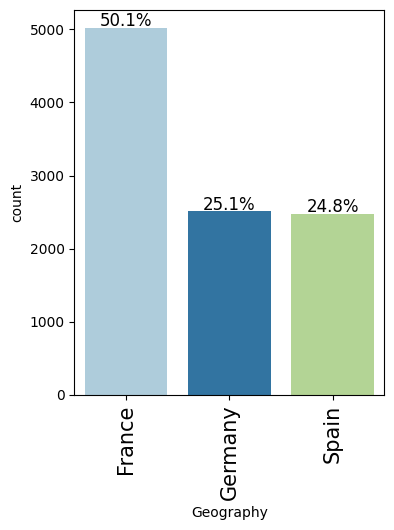

In [ ]:
labeled_barplot(ds, "Geography", perc=True)

* France has the highest representation with 50.1% of the customers in the dataset, followed by Germany with 25.1%, and Spain with 24.8%. This suggests that the dataset is biased towards customers from France, which is important to note when building models, as the performance might be skewed toward this group.
* The imbalance in geography might affect model training, and it may be useful to ensure that the model generalizes well to customers from all three countries, potentially adjusting for this geographic bias.

#### Observations on Gender

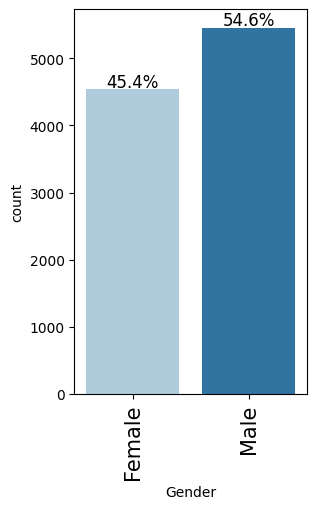

In [ ]:
labeled_barplot(ds, "Gender", perc=True)

* Male customers represent 54.6% of the total dataset, while Female customers account for 45.4%. This shows a slight gender imbalance in the dataset, with more male customers than female customers.
* The dataset is not highly imbalanced in terms of gender, but it is important to note the difference. During model training, gender might not need specific balancing, as the ratio is relatively even. However, it is still important to consider gender as a potential influencing feature in the model if customer behaviors differ by gender.

#### Observations on Tenure

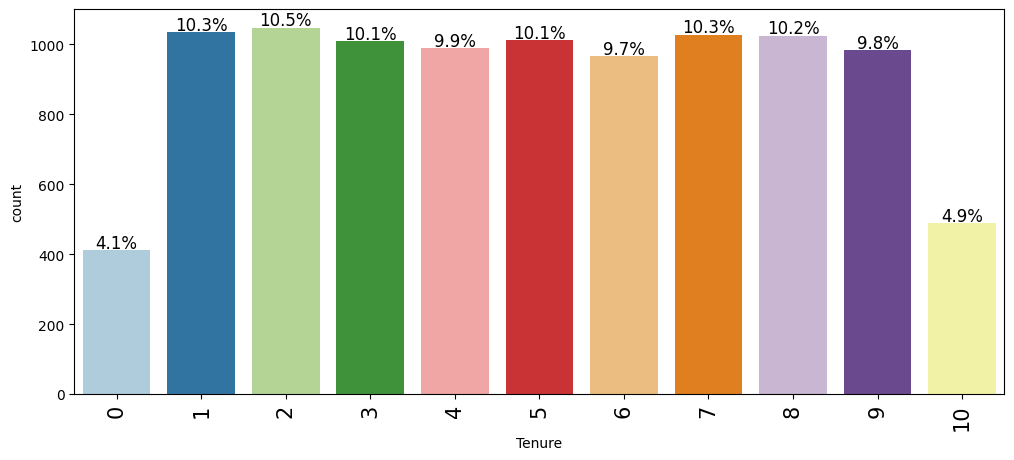

In [ ]:
labeled_barplot(ds, "Tenure", perc=True)

* A significant proportion of customers have been with the bank for 1 year or less, which may suggest a lot of recent customers or a high turnover rate among new sign-ups.
* The spread of tenure years shows a healthy mix of long-term and newer customers, indicating a potential relationship between tenure and churn rate. Customers with shorter tenures might be more prone to churn, which is important to consider when predicting churn.
* This is useful in identifying patterns that may affect customer retention or attrition, as longer tenure might indicate greater satisfaction or stronger customer loyalty.

#### Observations on Number of Products

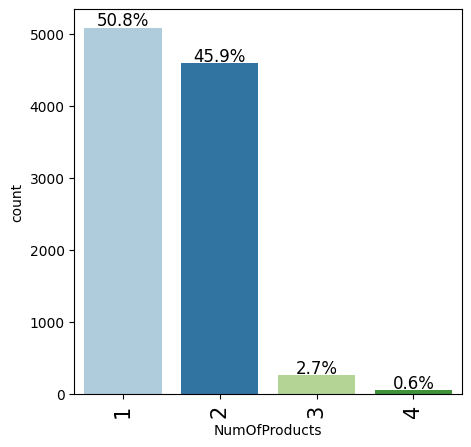

In [ ]:
labeled_barplot(ds, "NumOfProducts", perc=True)

* A large majority of customers (around 96.7%) have 1 or 2 products with the bank, which could suggest that most customers have basic banking relationships or a limited number of services.
* The relatively small percentages of customers with 3 or 4 products may indicate a high level of loyalty or more complex relationships with the bank.
* This feature may help in understanding customer engagement and retention, as customers with more products might be less likely to churn. The low count of customers with higher numbers of products can also provide insights into areas where the bank could potentially upsell or cross-sell more products to existing customers.

#### Observations on Has Credit Card

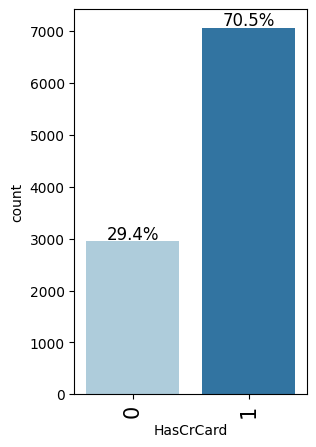

In [ ]:
labeled_barplot(ds, "HasCrCard", perc=True)

* A large proportion of customers (70.5%) have a credit card with the bank. This suggests that the bank has a strong adoption of credit card services among its customer base.
* 29.4% of customers without a credit card could represent an opportunity for the bank to increase product offerings and drive additional revenue by encouraging these customers to acquire a credit card.
* Since credit card ownership is likely tied to customer loyalty and engagement, analyzing this variable further may help in understanding customer retention and predicting churn, especially if customers without a credit card are more likely to leave the bank.

#### Observations on Is Active Member

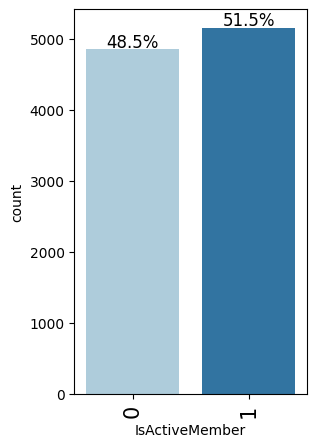

In [ ]:
labeled_barplot(ds, "IsActiveMember", perc=True)

* The dataset is fairly evenly split between active and inactive customers, with only a slight majority of active members.
* The active members are likely to be more engaged with the bank’s services, which could be important when considering churn prediction. Customers who are more engaged might be less likely to churn.
* It would be important to analyze why a large portion of the customers are inactive as they might be at a higher risk of churning. Insights into the inactive group could lead to better retention strategies and tailored offerings to increase engagement.

### Bivariate Analysis

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Correlation plot

In [ ]:
# defining the list of numerical columns
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

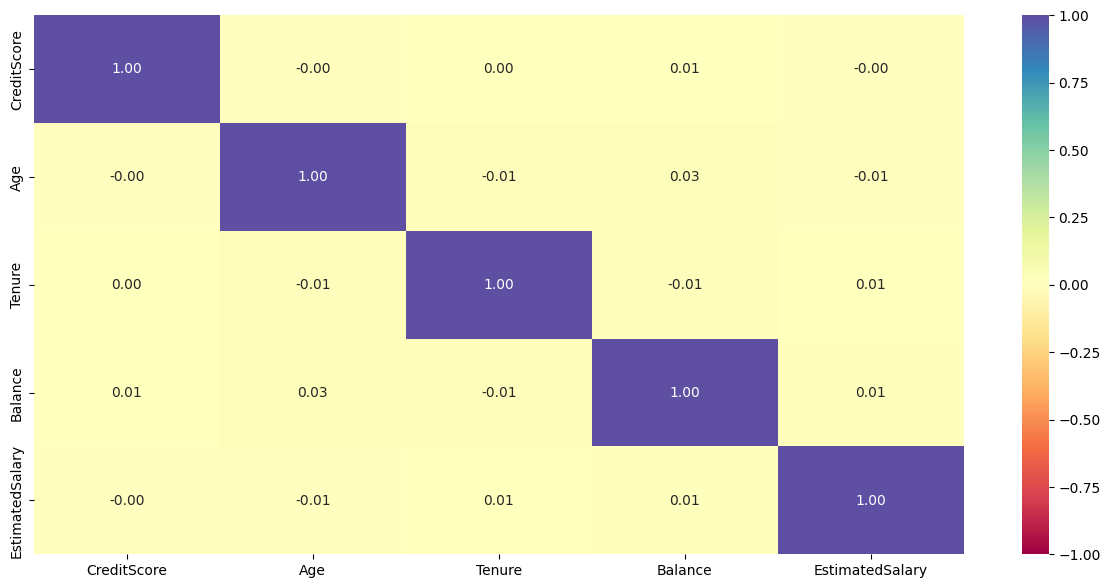

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(ds[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()


#### Exited Vs Geography

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


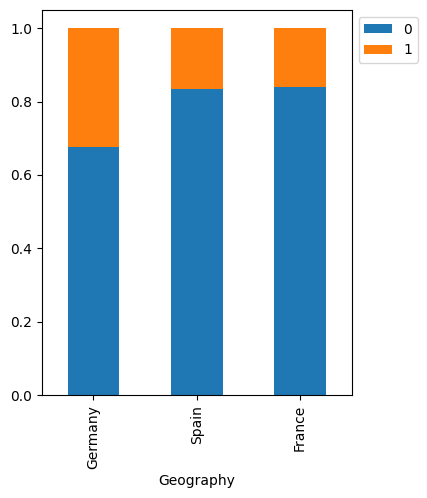

In [ ]:
stacked_barplot(ds, "Geography", "Exited" )

* There is a similar trend in all three countries, with the majority of customers remaining, but a notable proportion leaving.
* The proportion of customers who exited is relatively consistent across countries (around 30%). France and Spain show the lowest exit rate among the three.

#### Exited Vs Gender

Gender  Female  Male    All
Exited                     
All       4543  5457  10000
0         3404  4559   7963
1         1139   898   2037
------------------------------------------------------------------------------------------------------------------------


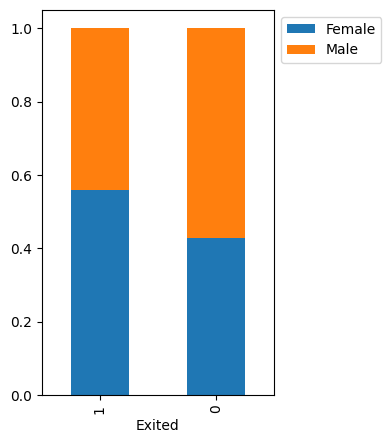

In [ ]:
stacked_barplot(ds, "Exited", "Gender" )

* The exit rate is slightly higher for females (24.8%) compared to males (16.4%). Males have a higher proportion of non-exiting customers.

#### Exited Vs Has Credit Card

HasCrCard     0     1    All
Exited                      
All        2945  7055  10000
0          2332  5631   7963
1           613  1424   2037
------------------------------------------------------------------------------------------------------------------------


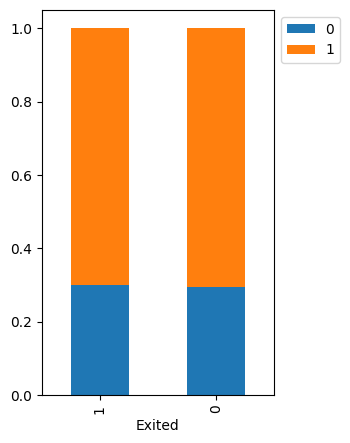

In [ ]:
stacked_barplot(ds, "Exited", "HasCrCard" )

* The exit rate is consistent between those with and without a credit card (around 20% exit rate). Customers with a credit card have a slightly higher overall population (7055) compared to non-credit card holders (2945).

#### Exited Vs Is active member

IsActiveMember     0     1    All
Exited                           
All             4849  5151  10000
0               3547  4416   7963
1               1302   735   2037
------------------------------------------------------------------------------------------------------------------------


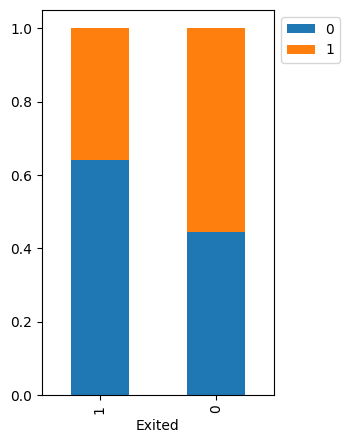

In [ ]:
stacked_barplot(ds, "Exited", "IsActiveMember")

* Active members tend to have a slightly lower exit rate (28%) compared to inactive members (26.7%).
* The exit rates between active and inactive members are quite close, suggesting that being an active member may not be a significant factor influencing the decision to leave the bank.

#### Exited Vs Credit Score

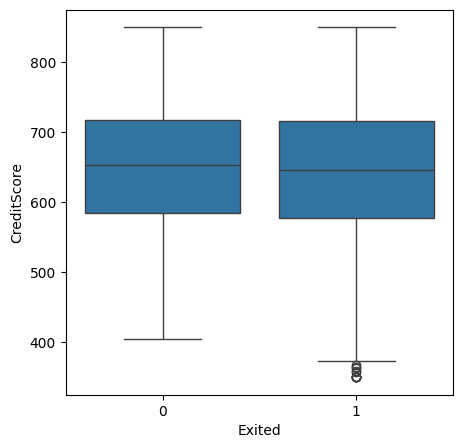

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=ds)
plt.show()

* Credit score appears to be roughly similar between customers who exited and those who stayed, as the central tendency (median) for both groups is quite close.
* Outliers for exited customers exist at the lower end of the scale, indicating that some customers with very low credit scores may be more likely to leave.

#### Exited Vs Age

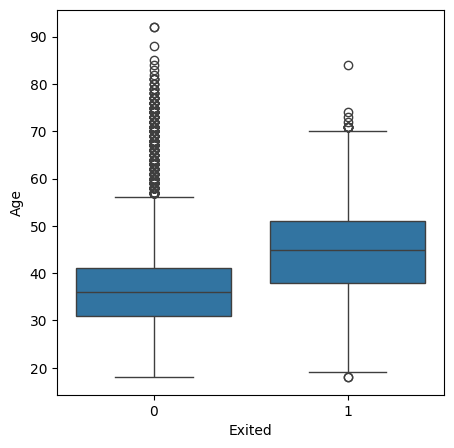

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Age',x='Exited',data=ds)
plt.show()

* Age is a key differentiator between customers who exit and those who stay. Older customers (median age around 46 years) show a higher tendency to leave the bank, while younger customers (median age around 37 years) are more likely to remain.

#### Exited Vs Tenure

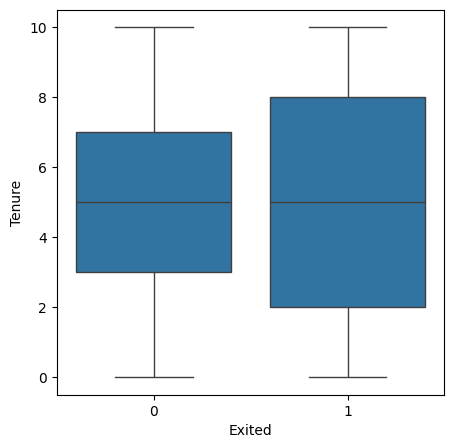

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Tenure',x='Exited',data=ds)
plt.show()

* Tenure does not appear to be a strong differentiator between customers who exit and those who stay. The distributions for both categories are almost identical, with no significant variation in median or spread.

#### Exited Vs Balance

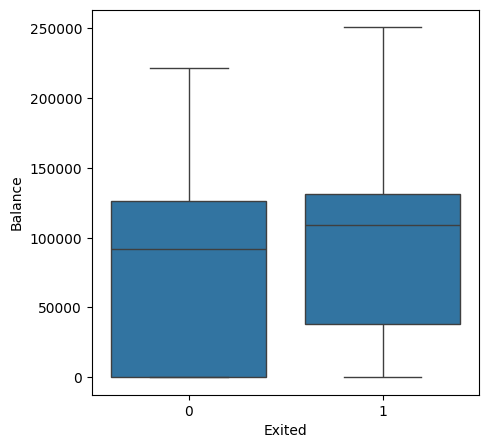

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=ds)
plt.show()

* Customers with higher balances tend to have a slightly higher likelihood of exiting. Balance might play a role in customer churn, as the distribution for those who exited shows a shift toward higher values compared to non-exiting customers.


#### Exited Vs Number of Products

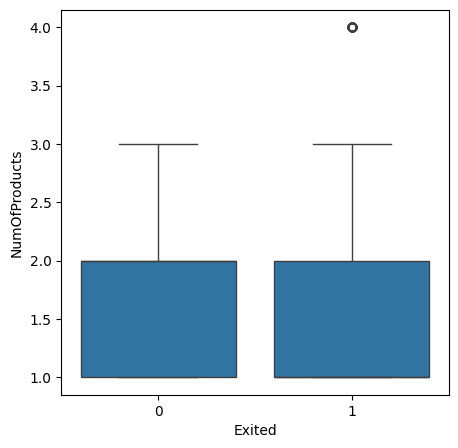

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='NumOfProducts',x='Exited',data=ds)
plt.show()

* The number of products held by a customer appears to have no strong correlation with the likelihood of exiting. Outliers, such as customers with 4 products, are present in both groups but are rare.

#### Exited Vs Estimated Salary

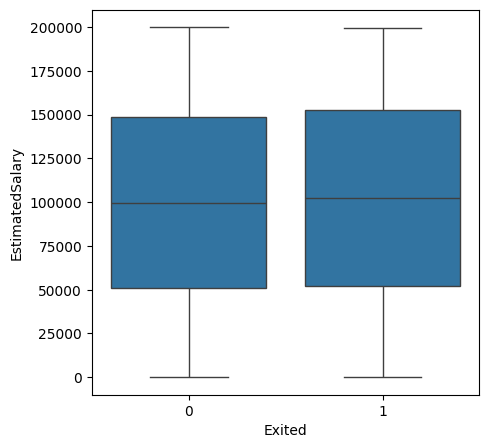

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=ds)
plt.show()

* There is no significant difference in the distribution of estimated salaries between customers who exited and those who did not. This suggests that salary is not a decisive factor influencing customer churn.

## Data Preprocessing

### Dummy Variable Creation

In [ ]:
ds = pd.get_dummies(ds,columns=ds.select_dtypes(include=["object"]).columns.tolist(),drop_first=True)
ds = ds.astype(float)
ds.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,0.0,0.0,0.0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,0.0,1.0,0.0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,0.0,0.0,0.0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,0.0,0.0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,1.0,0.0


### Train-validation-test Split

In [ ]:
X = ds.drop(['Exited'],axis=1) # Credit Score through Estimated Salary
y = ds['Exited'] # Exited

In [ ]:
# Splitting the dataset into the Training and Testing set.

X_large, X_test, y_large, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,stratify=y,shuffle = True)

In [ ]:
# Splitting the dataset into the Training and Testing set.

X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size = 0.2, random_state = 42,stratify=y_large, shuffle = True)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape)

(6400, 11) (1600, 11) (2000, 11)


In [ ]:
print(y_train.shape, y_val.shape, y_test.shape)

(6400,) (1600,) (2000,)


### Data Normalization

Since all the numerical values are on a different scale, so we will be scaling all the numerical values to bring them to the same scale.

In [ ]:
# creating an instance of the standard scaler
sc = StandardScaler()

X_train[cols_list] = sc.fit_transform(X_train[cols_list])
X_val[cols_list] = sc.transform(X_val[cols_list])
X_test[cols_list] = sc.transform(X_test[cols_list])

## Model Building

### Model Evaluation Criterion

**A model can make wrong predictions in the following ways:**
* Predicting a customer will churn when they actually won’t.
* Predicting a customer will not churn when they actually will.

**Which case is more important?**

Both cases are critical in the context of the Bank Churn prediction:
* Failing to identify a customer likely to churn (False Negatives) could result in the bank losing a valuable customer, leading to revenue loss and missed opportunities for retention strategies.
* Incorrectly predicting a customer will churn (False Positives) may lead to unnecessary expenditure on retention efforts for customers who do not intend to leave.

Based on the business context, minimizing False Negatives is slightly more important to retain valuable customers and reduce revenue loss. However, False Positives also incur a cost, so a balance is necessary.

**How to reduce this loss i.e., minimize both False Negatives and False Positives?**

* The F1 Score is the ideal evaluation metric in this scenario, as it balances Precision (avoiding False Positives) and Recall (avoiding False Negatives). Maximizing the F1 Score ensures a balance between capturing actual churners and minimizing unnecessary retention efforts.
* Since the dataset is imbalanced (fewer churners compared to non-churners), using class weights during model training ensures the minority class (churners) is adequately considered.

With the F1 Score, the model achieves an optimal trade-off between minimizing False Negatives and False Positives while adapting to the business needs of retaining high-value customers.


**Let's create a function for plotting the confusion matrix**



In [ ]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Let's create two blank dataframes that will store the recall values for all the models we build.

In [ ]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

### Neural Network with SGD Optimizer

In [ ]:
backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_0 = Sequential()
# Adding the input layer with 64 neurons and relu as activation function
model_0.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))

# Adding a hidden layer with 32 neurons and relu as activation function
model_0.add(Dense(32, activation='relu'))

# Adding the output layer with 1 neuron and sigmoid as activation function
model_0.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(0.001)

# metric to be used
metric = keras.metrics.F1Score()
metric = keras.metrics.Recall()

In [ ]:
#compiling the model with binary cross entropy as loss function and recall as the metric.
model_0.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
model_0.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fitting the ANN
history_0 = model_0.fit(
    X_train, y_train,
    batch_size=32,    ## Batch size = 32
    validation_data=(X_val,y_val),
    epochs=50,    ## Specifying the number of epochs
    verbose=1
)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4328 - recall: 0.1262 - val_loss: 0.4370 - val_recall: 0.1074
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4323 - recall: 0.1346 - val_loss: 0.4367 - val_recall: 0.1104
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4318 - recall: 0.1374 - val_loss: 0.4363 - val_recall: 0.1135
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4314 - recall: 0.1381 - val_loss: 0.4360 - val_recall: 0.1166
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4309 - recall: 0.1442 - val_loss: 0.4357 - val_recall: 0.1196
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4305 - recall: 0.1471 - val_loss: 0.4354 - val_recall: 0.1227
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4300 - recall: 0.1522 - val_loss: 0.4351 - val_recall: 0.1227
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4296 - recall: 0.1544 - val_loss: 0.4348 - val_recall: 0.1227
Epoch 9/

**Loss function**

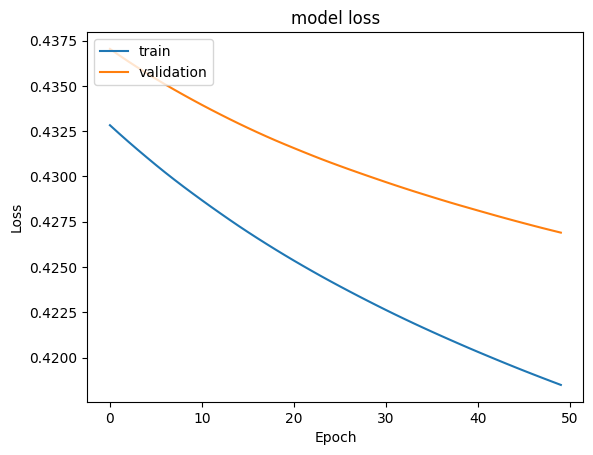

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

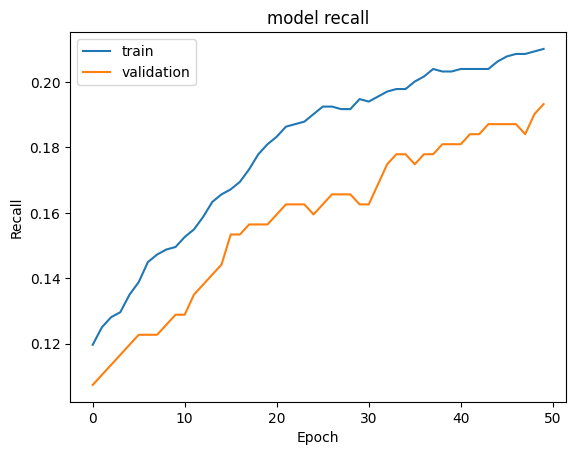

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_0.history['recall'])
plt.plot(history_0.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predicting the results using best as a threshold
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
#Predicting the results using best as a threshold
y_val_pred = model_0.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
model_name = "NN with SGD"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

**Classification report**

In [ ]:
#classification report
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.83      0.97      0.90      5096
         1.0       0.68      0.21      0.32      1304

    accuracy                           0.82      6400
   macro avg       0.76      0.59      0.61      6400
weighted avg       0.80      0.82      0.78      6400



In [ ]:
#classification report
cr=classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.83      0.97      0.89      1274
         1.0       0.66      0.19      0.30       326

    accuracy                           0.82      1600
   macro avg       0.74      0.58      0.60      1600
weighted avg       0.79      0.82      0.77      1600



**Confusion matrix**

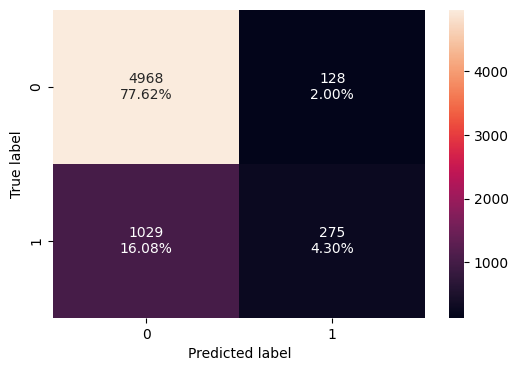

In [ ]:
make_confusion_matrix(y_train, y_train_pred)

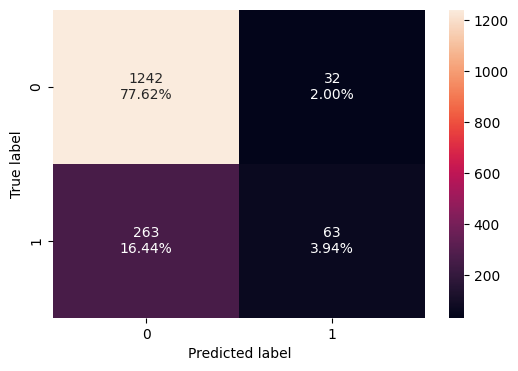

In [ ]:
make_confusion_matrix(y_val, y_val_pred)

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [ ]:
backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(64,activation='relu',input_dim = X_train.shape[1]))
model_1.add(Dense(32,activation='relu'))
model_1.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

metric = keras.metrics.Recall()

In [ ]:
# Compiling the model with binary cross entropy as loss function and recall as the metric
model_1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Fitting the ANN
history_1 = model_1.fit(
    X_train,y_train,
    batch_size=32,
    validation_data=(X_val,y_val),
    epochs=50,
    verbose=1
)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.5306 - recall: 0.1665 - val_loss: 0.4273 - val_recall: 0.1564
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4168 - recall: 0.2409 - val_loss: 0.4156 - val_recall: 0.2239
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4000 - recall: 0.3067 - val_loss: 0.4040 - val_recall: 0.2607
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3857 - recall: 0.3543 - val_loss: 0.3928 - val_recall: 0.3006
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3736 - recall: 0.3929 - val_loss: 0.3835 - val_recall: 0.3067
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3636 - recall: 0.4163 - val_loss: 0.3762 - val_recall: 0.3129
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3557 - recall: 0.4340 - val_loss: 0.3699 - val_recall: 0.3282
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3488 - recall: 0.4440 - val_loss: 0.3648 - val_recall: 0.3466
Epoch 9/

**Loss function**

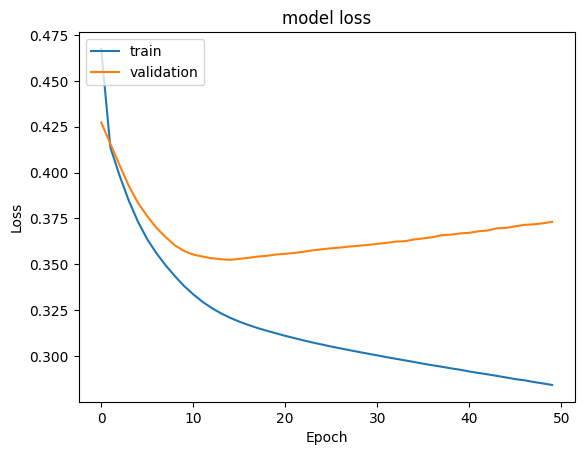

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

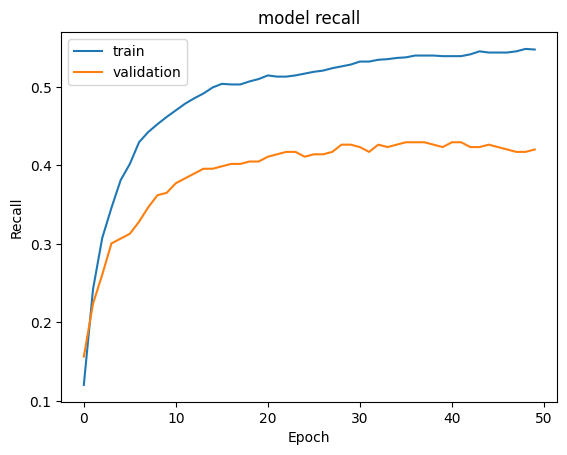

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_1.history['recall'])
plt.plot(history_1.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
#Predicting the results using 0.5 as the threshold
y_val_pred = model_1.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [ ]:
model_name = "NN with Adam"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
#lassification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      5096
         1.0       0.82      0.54      0.65      1304

    accuracy                           0.88      6400
   macro avg       0.86      0.76      0.79      6400
weighted avg       0.88      0.88      0.87      6400



In [ ]:
#classification report
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      1274
         1.0       0.73      0.42      0.53       326

    accuracy                           0.85      1600
   macro avg       0.80      0.69      0.72      1600
weighted avg       0.84      0.85      0.83      1600



**Confusion matrix**

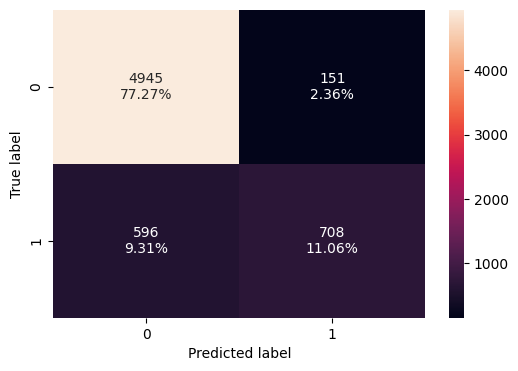

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

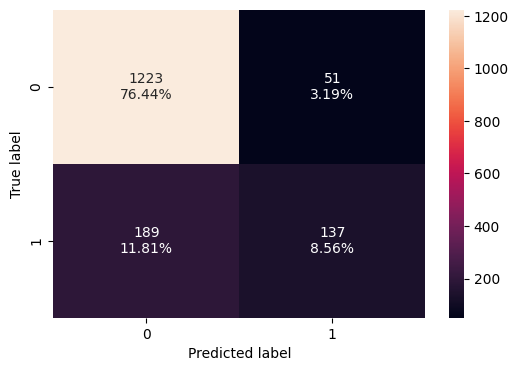

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

### Neural Network with Adam Optimizer and Dropout

In [ ]:
backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_2 = Sequential()

#Adding the input layer with 32 neurons and relu as activation function
model_2.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))

# Dropout with ratio of 0.2
model_2.add(Dropout(0.2))
model_2.add(Dense(64,activation='relu'))
model_2.add(Dense(32,activation='relu'))

# Dropout with ratio of 0.1
model_2.add(Dropout(0.1))
model_2.add(Dense(16,activation='relu'))
model_2.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()
metric = keras.metrics.Recall()

In [ ]:
## Compiling the model with binary cross entropy as loss function and recall as the metric.
model_2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
# Summary of the model
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Fitting the ANN with batch_size = 32 and 100 epochs
history_2 = model_2.fit(
    X_train,y_train,
    batch_size=32,
    epochs=100,
    verbose=1,
    validation_data=(X_val,y_val)
)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.4993 - recall: 0.0240 - val_loss: 0.4365 - val_recall: 0.0368
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4456 - recall: 0.1234 - val_loss: 0.4308 - val_recall: 0.1319
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4302 - recall: 0.2062 - val_loss: 0.4198 - val_recall: 0.2270
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4247 - recall: 0.2812 - val_loss: 0.4123 - val_recall: 0.2699
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4113 - recall: 0.3148 - val_loss: 0.4077 - val_recall: 0.2853
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.4108 - recall: 0.3090 - val_loss: 0.4066 - val_recall: 0.2761
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4035 - recall: 0.3291 - val_loss: 0.3992 - val_recall: 0.3037
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3963 - recall: 0.3793 - val_loss: 0.3956 - val_recall: 0.3160


**Loss function**

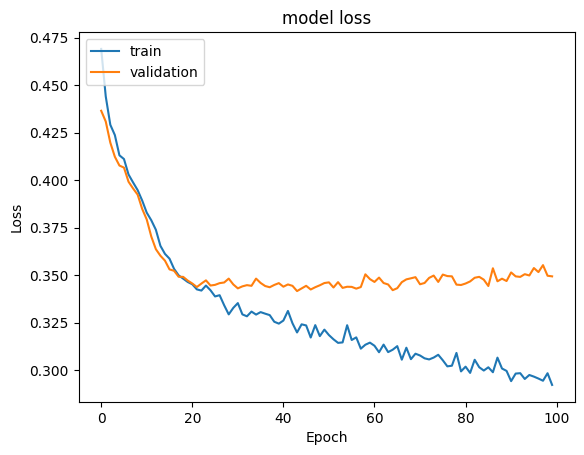

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we can observe that the train and validation curves are having smooth lines. Reducing the number of neurons and adding dropouts to the model worked, and the problem of overfitting was solved.

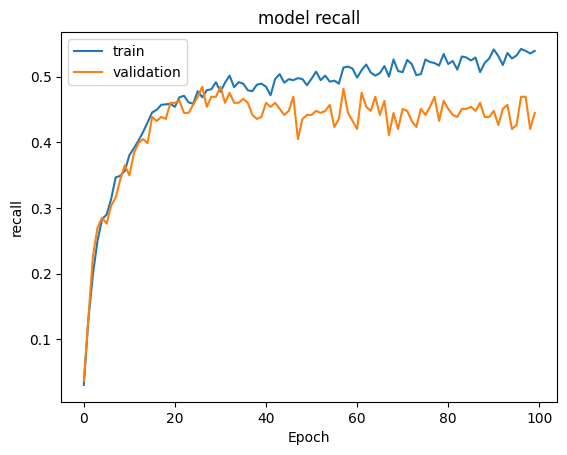

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_2.history['recall'])
plt.plot(history_2.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predicting the results using best as a threshold
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = model_2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [ ]:
model_name = "NN with Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
#classification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      5096
         1.0       0.85      0.57      0.68      1304

    accuracy                           0.89      6400
   macro avg       0.87      0.77      0.81      6400
weighted avg       0.89      0.89      0.88      6400



In [ ]:
#classification report
cr = classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      1274
         1.0       0.74      0.44      0.56       326

    accuracy                           0.85      1600
   macro avg       0.81      0.70      0.73      1600
weighted avg       0.84      0.85      0.84      1600



**Confusion matrix**

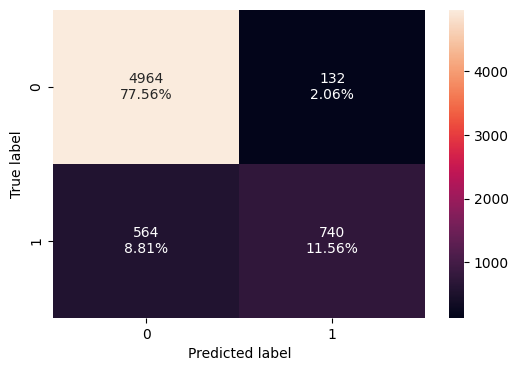

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

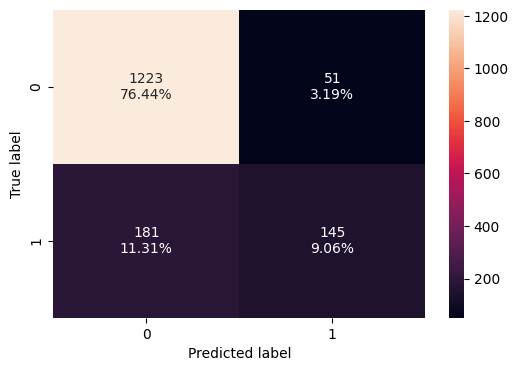

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

**Let's try to apply SMOTE to balance this dataset and then again apply hyperparamter tuning accordingly.**

In [ ]:
sm  = SMOTE(random_state=42)
X_train_smote, y_train_smote= sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192,) 



Let's build a model with the balanced dataset

In [ ]:
backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the model
model_3 = Sequential()
model_3.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
model_3.add(Dense(16,activation='relu'))
model_3.add(Dense(8,activation='relu'))
model_3.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(0.001)

metric = keras.metrics.Recall()

In [ ]:
# Compiling the model with binary cross entropy as loss function and recall as the metric
model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Fitting the ANN
history_3 = model_3.fit(
    X_train_smote, y_train_smote,
    batch_size=32,
    epochs=50,
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.7033 - recall: 0.9341 - val_loss: 0.7335 - val_recall: 0.9294
Epoch 2/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6998 - recall: 0.9263 - val_loss: 0.7242 - val_recall: 0.9202
Epoch 3/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6970 - recall: 0.9182 - val_loss: 0.7162 - val_recall: 0.9080
Epoch 4/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6945 - recall: 0.8908 - val_loss: 0.7086 - val_recall: 0.8773
Epoch 5/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6920 - recall: 0.8473 - val_loss: 0.7003 - val_recall: 0.8160
Epoch 6/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6889 - recall: 0.7740 - val_loss: 0.6898 - val_recall: 0.7515
Epoch 7/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6847 - recall: 0.7132 - val_loss: 0.6788 - val_recall: 0.6933
Epoch 8/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6803 - recall: 0.6674 - val_loss: 0.6690 - val_recall: 0.6656
Epoch 9/

**Loss function**

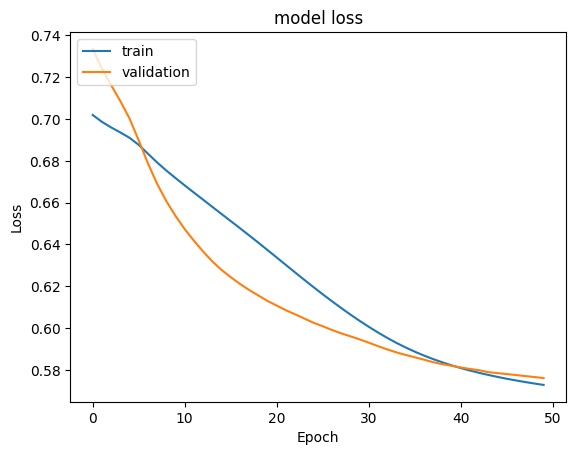

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

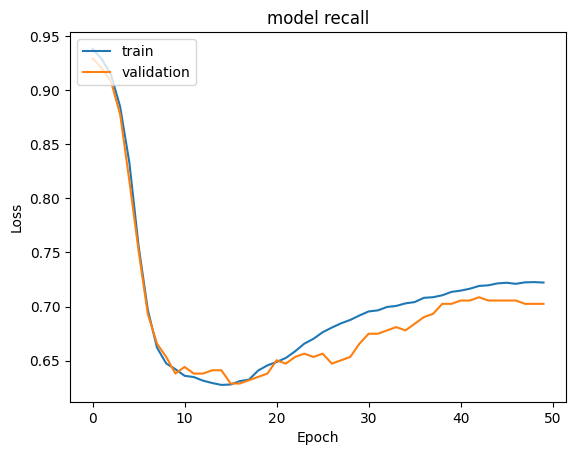

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_3.history['recall'])
plt.plot(history_3.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_train_pred = model_3.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
y_val_pred = model_3.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [ ]:
model_name = "NN with SMOTE & SGD"
train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.72      0.71      0.72      5096
         1.0       0.72      0.73      0.72      5096

    accuracy                           0.72     10192
   macro avg       0.72      0.72      0.72     10192
weighted avg       0.72      0.72      0.72     10192



In [ ]:
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.90      0.71      0.80      1274
         1.0       0.39      0.70      0.50       326

    accuracy                           0.71      1600
   macro avg       0.64      0.71      0.65      1600
weighted avg       0.80      0.71      0.74      1600



**Confusion matrix**

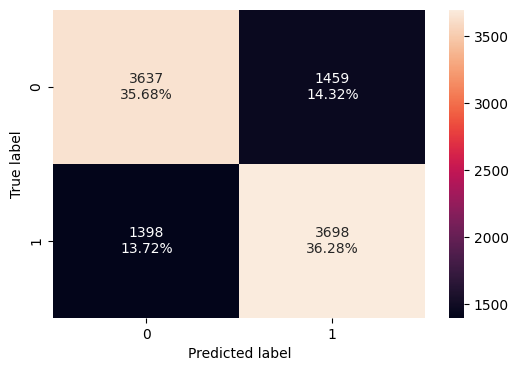

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

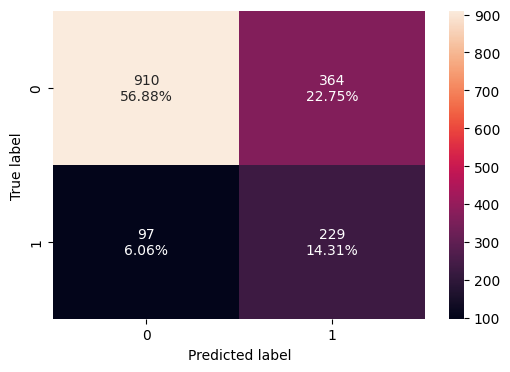

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

Let's build a model with the balanced dataset

In [ ]:
backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the model
model_4 = Sequential()
model_4.add(Dense(64,activation='relu',input_dim = X_train_smote.shape[1]))
model_4.add(Dense(32,activation='relu'))
model_4.add(Dense(16,activation='relu'))
model_4.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model_4.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

metric = keras.metrics.Recall()

In [ ]:
# Compiling the model with binary cross entropy as loss function and recall as the metric
model_4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
model_4.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Fitting the ANN

history_4 = model_4.fit(
    X_train_smote,y_train_smote,
    batch_size=32,
    epochs=50,
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2213 - recall_3: 0.9188 - val_loss: 0.6893 - val_recall_3: 0.6687
Epoch 2/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2183 - recall_3: 0.9193 - val_loss: 0.7000 - val_recall_3: 0.6626
Epoch 3/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2170 - recall_3: 0.9207 - val_loss: 0.7061 - val_recall_3: 0.6626
Epoch 4/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2145 - recall_3: 0.9220 - val_loss: 0.7021 - val_recall_3: 0.6687
Epoch 5/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2124 - recall_3: 0.9205 - val_loss: 0.7018 - val_recall_3: 0.6626
Epoch 6/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2097 - recall_3: 0.9229 - val_loss: 0.7018 - val_recall_3: 0.6595
Epoch 7/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2079 - recall_3: 0.9233 - val_loss: 0.7168 - val_recall_3: 0.6656
Epoch 8/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2054 - recall_3: 0.9258 - val_loss: 0.7242

**Loss function**

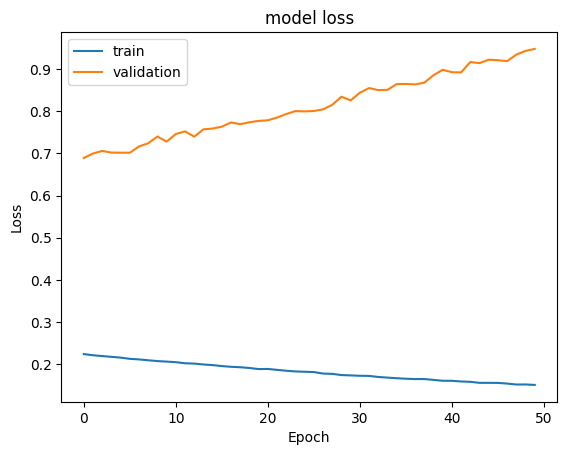

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_train_pred = model_4.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
y_val_pred = model_4.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
model_name = "NN with SMOTE & Adam"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93      5096
         1.0       0.91      0.96      0.93      5096

    accuracy                           0.93     10192
   macro avg       0.93      0.93      0.93     10192
weighted avg       0.93      0.93      0.93     10192



In [ ]:
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.88      0.83      0.85      1274
         1.0       0.46      0.56      0.50       326

    accuracy                           0.77      1600
   macro avg       0.67      0.69      0.68      1600
weighted avg       0.79      0.77      0.78      1600



**Confusion matrix**

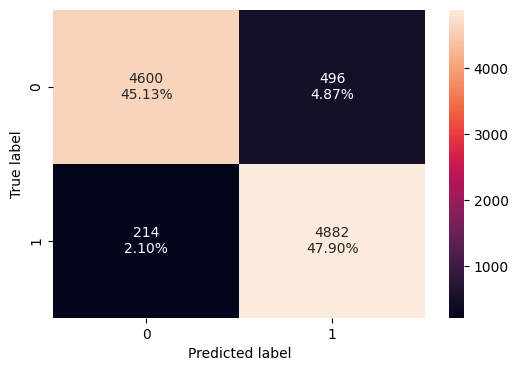

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

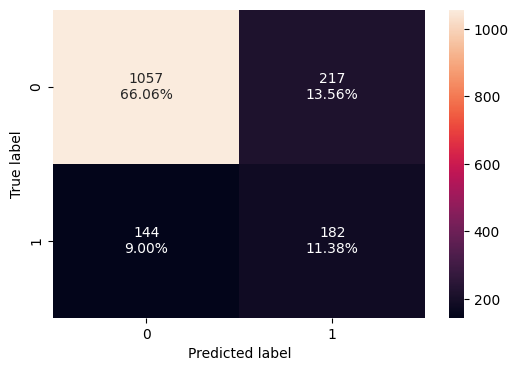

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [ ]:
backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the model
model_5 = Sequential()
model_5.add(Dense(64,activation='relu',input_dim = X_train_smote.shape[1]))
#Dropout rate
model_5.add(Dropout(0.2))
model_5.add(Dense(32,activation='relu'))
# Dropout rate.
model_5.add(Dropout(0.1))
model_5.add(Dense(8,activation='relu'))
model_5.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

metric = keras.metrics.Recall()

In [ ]:
# Compiling the model with binary cross entropy as loss function and recall as the metric
model_5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
model_5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,121 (12.19 KB)

 Trainable params: 3,121 (12.19 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_5 = model_5.fit(
    X_train_smote,y_train_smote,
    batch_size=32,
    epochs=50,
    verbose=1,
    validation_data = (X_val,y_val))

Epoch 1/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.6367 - recall: 0.6401 - val_loss: 0.5710 - val_recall: 0.6779
Epoch 2/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5599 - recall: 0.7121 - val_loss: 0.5511 - val_recall: 0.6626
Epoch 3/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5427 - recall: 0.7243 - val_loss: 0.5607 - val_recall: 0.6902
Epoch 4/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5233 - recall: 0.7282 - val_loss: 0.5284 - val_recall: 0.6871
Epoch 5/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5045 - recall: 0.7329 - val_loss: 0.4996 - val_recall: 0.6779
Epoch 6/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4918 - recall: 0.7496 - val_loss: 0.4928 - val_recall: 0.6933
Epoch 7/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4844 - recall: 0.7561 - val_loss: 0.4837 - val_recall: 0.7025
Epoch 8/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4767 - recall: 0.7598 - val_loss: 0.4897 - val_recall: 0.7209
Epoch 9/

**Loss function**

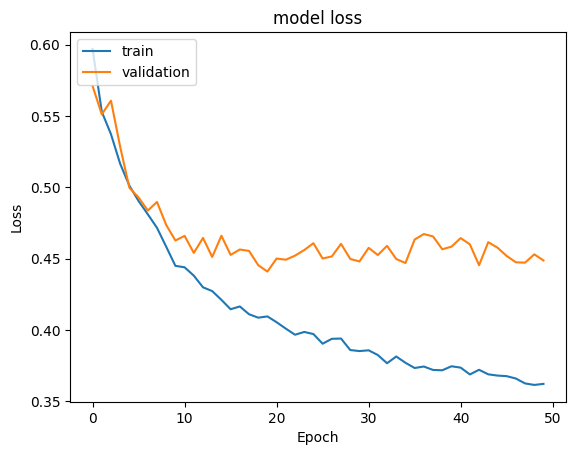

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

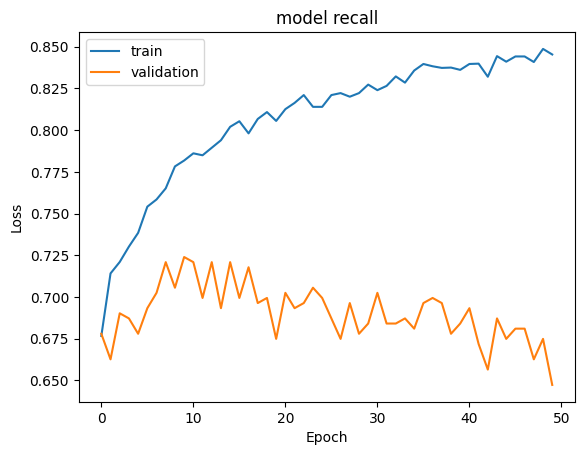

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_5.history['recall'])
plt.plot(history_5.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_train_pred = model_5.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
y_val_pred = model_5.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [ ]:
model_name = "NN with SMOTE,Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87      5096
         1.0       0.86      0.88      0.87      5096

    accuracy                           0.87     10192
   macro avg       0.87      0.87      0.87     10192
weighted avg       0.87      0.87      0.87     10192



In [ ]:
#classification report
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87      1274
         1.0       0.51      0.65      0.57       326

    accuracy                           0.80      1600
   macro avg       0.71      0.74      0.72      1600
weighted avg       0.82      0.80      0.81      1600



**Confusion matrix**

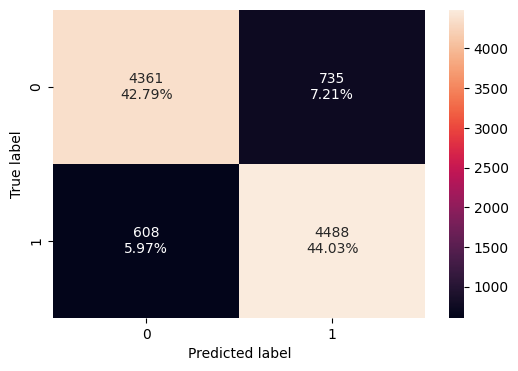

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

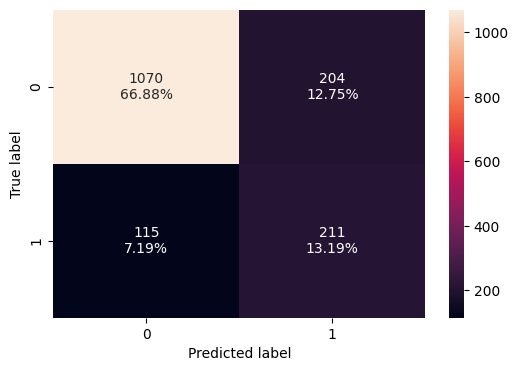

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

## Model Performance Comparison and Final Model Selection

In [ ]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,recall
NN with SGD,0.210890
NN with Adam,0.542945
NN with Adam & Dropout,0.567485
NN with SMOTE & SGD,0.725667
NN with SMOTE & Adam,0.958006
"NN with SMOTE,Adam & Dropout",0.880691


* NN with SGD: The recall is the lowest at 0.210890, indicating poor performance in identifying the positive class.
* NN with Adam: Significant improvement with recall at 0.542945, showcasing the effectiveness of the Adam optimizer.
* NN with Adam & Dropout: Slight improvement to 0.567485, suggesting that dropout provides regularization benefits while maintaining performance.
* NN with SMOTE & SGD: A major leap to 0.725667, showing that balancing the dataset with SMOTE significantly enhances recall.
* NN with SMOTE & Adam: Achieves the best recall of 0.958006, indicating the combination of SMOTE and Adam optimizer is highly effective.
* NN with SMOTE, Adam & Dropout: Slight decrease to 0.880691, likely due to dropout regularization reducing overfitting.

In [ ]:
print("Validation set performance comparison")
valid_metric_df

Validation set performance comparison


,recall
NN with SGD,0.193252
NN with Adam,0.420245
NN with Adam & Dropout,0.444785
NN with SMOTE & SGD,0.702454
NN with SMOTE & Adam,0.558282
"NN with SMOTE,Adam & Dropout",0.647239


* NN with SGD: The lowest recall at 0.193252, reaffirming its underperformance on unseen data.
* NN with Adam: Recall improves to 0.420245, showing that the optimizer helps in better generalization.
* NN with Adam & Dropout: Slight increase to 0.444785, suggesting dropout helps mitigate overfitting while slightly improving recall.
* NN with SMOTE & SGD: Recall improves substantially to 0.702454, demonstrating the power of a balanced dataset.
* NN with SMOTE & Adam: Recall drops slightly to 0.558282, possibly due to overfitting in training or sensitivity to SMOTE-balanced data.
* NN with SMOTE, Adam & Dropout: Recall further improves to 0.647239, showcasing a balance between regularization and the benefits of SMOTE.

In [ ]:
train_metric_df - valid_metric_df

,recall
NN with SGD,0.017638
NN with Adam,0.122699
NN with Adam & Dropout,0.122699
NN with SMOTE & SGD,0.023213
NN with SMOTE & Adam,0.399724
"NN with SMOTE,Adam & Dropout",0.233451


**Observations on the Difference Between Training and Validation Recall:**

1.   NN with SGD: This small difference indicates consistent performance but also confirms that the model’s recall is generally poor on both training and validation datasets.
2.	NN with Adam: The difference suggests some overfitting, as the model performs better on the training set than the validation set.
3.	NN with Adam & Dropout: Similar to the previous model, indicating that dropout didn’t significantly mitigate overfitting in this case.
4.	NN with SMOTE & SGD: This is a very small difference, suggesting that the model generalizes well across training and validation datasets when combined with SMOTE.
5.	NN with SMOTE & Adam: Substantial difference here indicates significant overfitting on the training data. While SMOTE balances the dataset, the model struggles to generalize with the Adam optimizer.
6.	NN with SMOTE, Adam & Dropout: Dropout helps reduce overfitting compared to the previous model, but the difference still indicates room for improvement in generalization.

**Key Takeaways:**

* NN with SMOTE & SGD has the smallest difference in recall between training and validation datasets, making it the most consistent model in terms of generalization.
* NN with SMOTE, Adam & Dropout strikes a balance between high recall and reduced overfitting, though its generalization could still be better.

**Recommendation:**

The NN with SMOTE & SGD is the most stable and generalizable model based on the difference analysis. However, if recall is the priority metric and some overfitting is acceptable, the NN with SMOTE, Adam & Dropout remains a strong candidate.

In [ ]:
# specifying Model 3 as the best model
y_test_pred = model_3.predict(X_test)
y_test_pred = (y_test_pred > 0.5)
print(y_test_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [ ]:
#lets print classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.91      0.71      0.80      1593
         1.0       0.39      0.73      0.51       407

    accuracy                           0.71      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.81      0.71      0.74      2000



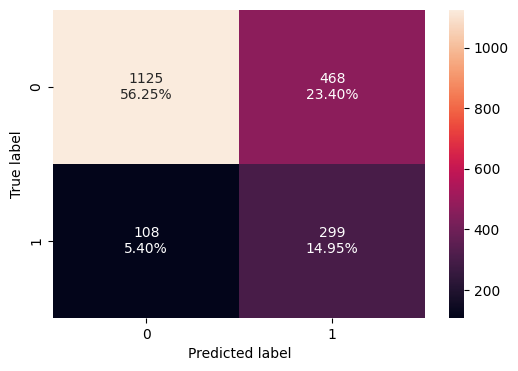

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

## Actionable Insights and Business Recommendations

* Utilize Churn Prediction Model for Retention Strategies:
The final model can be implemented to identify customers at a high risk of churn with reasonable accuracy, enabling the bank to proactively engage with these customers and take measures to retain them. This data-driven approach is more efficient and targeted compared to traditional methods.

* Focus on Regional Customer Needs:
Customers in Germany show a higher churn rate compared to other regions. The bank should analyze potential pain points specific to this geography, such as service quality or product alignment with customer needs, and deploy regionalized strategies to address these concerns.

* Introduce Personalized Financial Solutions for Female Customers:
Female customers have a higher likelihood of churning. The bank should implement initiatives such as personalized financial products, women-focused advisory services, and loyalty programs to improve satisfaction and retention in this segment.

* Engagement Programs for Inactive Members:
Churn is higher among inactive members. The bank should implement programs to convert inactive customers into active users through engagement campaigns, rewards for activity, and showcasing product benefits.

* Retain High-Balance Customers:
High-balance customers have a higher churn rate despite their value to the bank. Implement premium services such as priority customer support, exclusive financial products, and loyalty benefits to ensure their retention.

* Promote Cross-Selling:
Customers with a single product are more likely to churn. The bank should actively encourage product diversification by offering bundled benefits or discounts for subscribing to additional products. Tailored recommendations based on customer data can also help.

* Continuously Monitor and Update Retention Strategies:
The bank should establish a feedback loop using customer churn insights to refine products, services, and engagement strategies. Regular updates to the model with new data will ensure its adaptability to changing customer behaviors.

